

> **Welcome to PyTorch Basics**

*   Learn what is tensor and how to deal with it.
*   Tensor operations
*   Work seamlessly with numpy and pytorch
*   PyTorch with GPU

*   Linear and Logistic Regression using pytorch
*   Neural Nets with pytorch


In [0]:
import torch

In [82]:
# create a tensor
tensor = torch.Tensor([[1, 2], [3, 4]])
print(tensor)

int_tensor = torch.zeros([2, 2], dtype=torch.int32)
print(int_tensor.type())
print(tensor.type())

tensor([[1., 2.],
        [3., 4.]])
torch.IntTensor
torch.FloatTensor


In [83]:
# shape of the tensor
print(tensor.shape)
print(tensor.size())

torch.Size([2, 2])
torch.Size([2, 2])


In [84]:
# create a random tensor
empty_tensor = torch.Tensor(2,2)
print(empty_tensor)

tensor([[5.5310e+27, 0.0000e+00],
        [4.4842e-44, 0.0000e+00]])


In [85]:
# create a tensor with value between -1 and 1
uniform_tensor = torch.Tensor(2, 2).uniform_(-1, 1)
print(uniform_tensor)

tensor([[ 0.4845,  0.2023],
        [ 0.7255, -0.3425]])


In [86]:
# create a random tensor with values between 0 and 1
rand_tensor = torch.rand(2, )
print(rand_tensor)


tensor([0.3282, 0.6194])


**Tensor Operation**


In [87]:
# access an element from a tensor
print(tensor[0][0]) 
print(tensor[0][0].item())

tensor(1.)
1.0


In [88]:
# replace an item at position (1,1)
tensor[1][1] = 5
print(tensor)

tensor([[1., 2.],
        [3., 5.]])


In [89]:
# create a tensor for slicing operations
slicing_tensor = torch.Tensor([[0, 1 , 2], [3, 4, 5]])
print(slicing_tensor.shape)

# elements from every row and first column
print(slicing_tensor[:, 0])

# elements from every row and last column
print(slicing_tensor[:, -1])

# all elements from the first two columns
print(slicing_tensor[:, :2])

torch.Size([2, 3])
tensor([0., 3.])
tensor([2., 5.])
tensor([[0., 1.],
        [3., 4.]])


In [90]:
# reshape a tensor
reshape_tensor = torch.Tensor([[0, 1, 2], [3, 4, 5]])
print(reshape_tensor.shape)

reshape_tensor = reshape_tensor.view(1, 6)
print(reshape_tensor)
print(reshape_tensor.shape)

torch.Size([2, 3])
tensor([[0., 1., 2., 3., 4., 5.]])
torch.Size([1, 6])


**Bridge between numpy and pytorch**

In [91]:
import numpy as np
# create a numpy array
np_ndarray = np.random.randn(2, 2)

# convert numpy array to pytorch tensor
to_tensor = torch.from_numpy(np_ndarray)
print(to_tensor)

# convert torch tensor to numpy array
to_numpy = to_tensor.numpy()
print(to_numpy)


tensor([[ 0.0642, -1.2433],
        [ 0.6279,  1.8401]], dtype=torch.float64)
[[ 0.06419363 -1.24329566]
 [ 0.62787306  1.8400619 ]]


**Basic Tensor Operations**

In [92]:
# transpose a tensor
my_tensor = torch.Tensor([[1, 2, 3], [4, 5, 6]])
print(my_tensor.shape)

my_transposed_tensor = my_tensor.t()
print(my_transposed_tensor.shape)

torch.Size([2, 3])
torch.Size([3, 2])


In [93]:
# tensor addition
tensor_1 = torch.Tensor([1, 2])
tensor_2 = torch.Tensor([2, 1])
print(tensor_1 + tensor_2)

tensor([3., 3.])


In [94]:
# tensor subtraction
print(tensor_1 - tensor_2)

tensor([-1.,  1.])


In [95]:
# cross product
tensor_1 = torch.Tensor([[1, 2, 3], [3, 4, 5]])
tensor_2 = torch.Tensor([[3, 2, 1], [5, 4, 3]])

cross_tensor = tensor_1.cross(tensor_2)
print(cross_tensor)

tensor([[-4.,  8., -4.],
        [-8., 16., -8.]])


In [96]:
# matrix multiplication
tensor_1 = torch.Tensor([[1, 0], [0, 1]])
tensor_2 = torch.Tensor([[2, 0], [0, 2]])
matmul_tensor = tensor_1.mm(tensor_2)
print(matmul_tensor)

tensor([[2., 0.],
        [0., 2.]])


In [97]:
# elementwise multiplication
tensor_1 = torch.Tensor([1, 2, 3, 4])
tensor_2 = torch.Tensor([2, 1, 4, 3])
elemmul_tensor = tensor_1.mul(tensor_2)
print(elemmul_tensor)

tensor([ 2.,  2., 12., 12.])


**GPU/CUDA**

> You can accelerate your tensor operations using GPU. Here is how you can do it!


In [98]:
print(torch.cuda.is_available())
tensor_1 = torch.Tensor([[1, 0], [0, 1]])
tensor_2 = torch.Tensor([[2, 0], [0, 2]])
tensor_1 = tensor_1.cuda()
tensor_2 = tensor_2.cuda()
print(tensor_1.mm(tensor_2))

True
tensor([[2., 0.],
        [0., 2.]], device='cuda:0')


**Linear Regression**

```
Ŷ = bX + a + e
```



In [99]:
# how to calculate gradient of a variable
x = torch.tensor(3., requires_grad=True)
w = torch.tensor(2., requires_grad=True)
b = torch.tensor(1., requires_grad=True)

# build the computation graph
y = w*x + b

# compute gradients
y.backward()

# print the gradients
print(x.grad)
print(w.grad)
print(b.grad)

tensor(2.)
tensor(3.)
tensor(1.)


In [100]:
# learn to build loss function and optimiser
x = torch.rand(10, 3)
y = torch.rand(10, 2)

# build a fully connected layer. this is our model
linear = torch.nn.Linear(3, 2)

print('Weight : ', linear.weight)
print('Bias : ', linear.bias)

# define loss function and optimiser
criterion = torch.nn.MSELoss()
optimiser = torch.optim.SGD(linear.parameters(), lr=0.01)

# forward pass
pred = linear(x)

# compute loss
loss = criterion(pred, y)
print('Loss: ', loss.item())

# backward pass
loss.backward()
print('dL/dW : ', linear.weight)
print('dL/db : ', linear.bias)

# update the weight and bias
optimiser.step()

# print loss after 1 step of SGD
pred = linear(x)
loss = criterion(pred, y)
print('Loss : ', loss.item())


Weight :  Parameter containing:
tensor([[ 0.3938,  0.1538,  0.1772],
        [ 0.1885, -0.0399, -0.0179]], requires_grad=True)
Bias :  Parameter containing:
tensor([-0.1385,  0.5432], requires_grad=True)
Loss:  0.12052497267723083
dL/dW :  Parameter containing:
tensor([[ 0.3938,  0.1538,  0.1772],
        [ 0.1885, -0.0399, -0.0179]], requires_grad=True)
dL/db :  Parameter containing:
tensor([-0.1385,  0.5432], requires_grad=True)
Loss :  0.11848536878824234


**Linear Regression, finally!**

In [101]:
# hyper-parameters
input_size = 1
output_size = 1
num_epochs = 100
learning_rate = 0.01

# toy-dataset
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168],
                    [9.779], [6.182], [7.59], [2.167], [7.042],
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573],
                    [3.366], [2.596], [2.53], [1.221], [2.827],
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

# linear regression model
model = torch.nn.Linear(input_size, output_size)

# loss function and optimiser
criterion = torch.nn.MSELoss()
optimiser = torch.optim.SGD(model.parameters(), lr=learning_rate)

# train the model
for epoch in range(num_epochs):
  # convert numpy array to torch tensors
  inputs = torch.from_numpy(x_train)
  targets = torch.from_numpy(y_train)

  # forward pass
  outputs = model(inputs)
  loss = criterion(outputs, targets)

  # backward pass
  optimiser.zero_grad()
  loss.backward()
  optimiser.step()

  if (epoch + 1) % 5 == 0:
    print('Epoch [{}/{}], Loss : {:.4f}'.format(epoch, num_epochs, loss.item()))

Epoch [4/100], Loss : 0.4557
Epoch [9/100], Loss : 0.4485
Epoch [14/100], Loss : 0.4414
Epoch [19/100], Loss : 0.4344
Epoch [24/100], Loss : 0.4277
Epoch [29/100], Loss : 0.4211
Epoch [34/100], Loss : 0.4147
Epoch [39/100], Loss : 0.4085
Epoch [44/100], Loss : 0.4024
Epoch [49/100], Loss : 0.3965
Epoch [54/100], Loss : 0.3907
Epoch [59/100], Loss : 0.3851
Epoch [64/100], Loss : 0.3796
Epoch [69/100], Loss : 0.3742
Epoch [74/100], Loss : 0.3690
Epoch [79/100], Loss : 0.3639
Epoch [84/100], Loss : 0.3590
Epoch [89/100], Loss : 0.3542
Epoch [94/100], Loss : 0.3495
Epoch [99/100], Loss : 0.3449


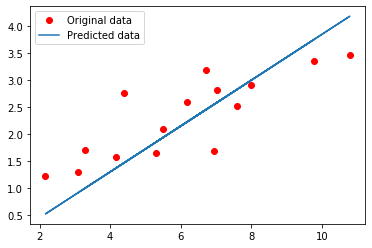

In [102]:
import matplotlib.pyplot as plt
predicted = model(torch.from_numpy(x_train)).detach().numpy()
plt.plot(x_train, y_train, 'ro', label='Original data')
plt.plot(x_train, predicted, label='Predicted data')
plt.legend()
plt.show()

**Logistic Regression**

In [0]:
import torchvision

In [104]:
# hyper-parameters
input_size = 784
num_classes = 10
num_epochs = 5
batch_size = 100
learning_rate = 0.001

# MNIST data (images and labels)
train_dataset = torchvision.datasets.MNIST('./data', train=True, transform=torchvision.transforms.ToTensor(), download=True)
test_dataset = torchvision.datasets.MNIST('./data', train=False, transform=torchvision.transforms.ToTensor())

# data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

# logistic regression model
model = torch.nn.Linear(input_size, num_classes)

# loss function and optimiser
criterion = torch.nn.CrossEntropyLoss()
optimiser = torch.optim.SGD(model.parameters(), lr=learning_rate)

total_step = len(train_loader)
for epoch in range(num_epochs):
  for i, (images, labels) in enumerate(train_loader):
    # reshape images to (batch_size, input_size)
    images = images.reshape(-1, 28*28)

    # forward pass
    outputs = model(images)
    loss = criterion(outputs, labels)

    # backward pass
    optimiser.zero_grad()
    loss.backward()
    optimiser.step()

    if (i+1)%100 == 0:
      print('Epoch: [{}/{}], Step: [{}/{}], Loss: {}'.format(epoch+1, num_epochs, (i+1), total_step, loss.item()))


Epoch: [0/5], Step: [100/600], Loss: 2.275242567062378
Epoch: [0/5], Step: [200/600], Loss: 2.1301276683807373
Epoch: [0/5], Step: [300/600], Loss: 2.0826468467712402
Epoch: [0/5], Step: [400/600], Loss: 1.9868426322937012
Epoch: [0/5], Step: [500/600], Loss: 1.933735966682434
Epoch: [0/5], Step: [600/600], Loss: 1.8777661323547363
Epoch: [1/5], Step: [100/600], Loss: 1.7542041540145874
Epoch: [1/5], Step: [200/600], Loss: 1.7108606100082397
Epoch: [1/5], Step: [300/600], Loss: 1.668391466140747
Epoch: [1/5], Step: [400/600], Loss: 1.567360520362854
Epoch: [1/5], Step: [500/600], Loss: 1.4745100736618042
Epoch: [1/5], Step: [600/600], Loss: 1.5267373323440552
Epoch: [2/5], Step: [100/600], Loss: 1.4290955066680908
Epoch: [2/5], Step: [200/600], Loss: 1.372494101524353
Epoch: [2/5], Step: [300/600], Loss: 1.3481389284133911
Epoch: [2/5], Step: [400/600], Loss: 1.3037468194961548
Epoch: [2/5], Step: [500/600], Loss: 1.368414282798767
Epoch: [2/5], Step: [600/600], Loss: 1.257107019424438

In [105]:
# test the model
# in test phase, we don't need the gradients
with torch.no_grad():
  correct = 0
  total = 0
  for images, labels in test_loader:
    images = images.reshape(-1, 28*28)
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()

  print('Accuracy of the model on 10000 test images : {} %'.format(100 * correct / total))


Accuracy of the model on 10000 test images : 82 %


**Neural Network**

In [111]:
from torch.utils.tensorboard import SummaryWriter
# writer will output to ./runs/ directory by default
writer = SummaryWriter()
# device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# hyper-parameter
input_size = 784
hidden_size = 500
num_classes = 10
num_epochs = 5
batch_size = 100
learning_rate = 0.001

# MNIST data (images and labels)
train_dataset = torchvision.datasets.MNIST('./data', train=True, transform=torchvision.transforms.ToTensor(), download=True)
test_dataset = torchvision.datasets.MNIST('.data', train=False, transform=torchvision.transforms.ToTensor(), download=True)

# data loader
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# fully connected neural net with one hidden layer
class NeuralNet(torch.nn.Module):
  def __init__(self, input_size, hidden_size, num_classes):
    super(NeuralNet, self).__init__()
    self.fc1 = torch.nn.Linear(input_size, hidden_size)
    self.relu = torch.nn.ReLU()
    self.fc2 = torch.nn.Linear(hidden_size, num_classes)
  
  def forward(self, x):
    out = self.fc1(x)
    out = self.relu(out)
    out = self.fc2(out)
    return out

model = NeuralNet(input_size, hidden_size, num_classes).to(device)

# loss and optimiser
criterion = torch.nn.CrossEntropyLoss()
optimiser = torch.optim.SGD(model.parameters(), lr=learning_rate)

# train the model
total_step = len(train_loader)
for epoch in range(num_epochs):
  for i, (images, labels) in enumerate(train_loader):
    images = images.reshape(-1, 28*28).to(device)
    labels = labels.to(device)

    # forward pass
    outputs = model(images)
    loss = criterion(outputs, labels)
    
    # backward pass
    optimiser.zero_grad()
    loss.backward()
    optimiser.step()

    if (i+1) % 100 == 0:
      print('Epoch: [{}/{}], Step: [{}/{}], Loss: '.format(epoch+1, num_epochs, i+1, total_step, loss.item()))



Epoch: [1/5], Step: [100/600], Loss: 
Epoch: [1/5], Step: [200/600], Loss: 
Epoch: [1/5], Step: [300/600], Loss: 
Epoch: [1/5], Step: [400/600], Loss: 
Epoch: [1/5], Step: [500/600], Loss: 
Epoch: [1/5], Step: [600/600], Loss: 
Epoch: [2/5], Step: [100/600], Loss: 
Epoch: [2/5], Step: [200/600], Loss: 
Epoch: [2/5], Step: [300/600], Loss: 
Epoch: [2/5], Step: [400/600], Loss: 
Epoch: [2/5], Step: [500/600], Loss: 
Epoch: [2/5], Step: [600/600], Loss: 
Epoch: [3/5], Step: [100/600], Loss: 
Epoch: [3/5], Step: [200/600], Loss: 
Epoch: [3/5], Step: [300/600], Loss: 
Epoch: [3/5], Step: [400/600], Loss: 
Epoch: [3/5], Step: [500/600], Loss: 
Epoch: [3/5], Step: [600/600], Loss: 
Epoch: [4/5], Step: [100/600], Loss: 
Epoch: [4/5], Step: [200/600], Loss: 
Epoch: [4/5], Step: [300/600], Loss: 
Epoch: [4/5], Step: [400/600], Loss: 
Epoch: [4/5], Step: [500/600], Loss: 
Epoch: [4/5], Step: [600/600], Loss: 
Epoch: [5/5], Step: [100/600], Loss: 
Epoch: [5/5], Step: [200/600], Loss: 
Epoch: [5/5]

In [113]:
# test the model
# in test phase, we don't need to compute the gradients (for memory efficiency)
with torch.no_grad():
  for images, labels in test_loader:
    images = images.reshape(-1, 28*28).to(device)
    labels = labels.to(device)
    outputs = model(images)
    _, predicted = torch.max(outputs, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()
  
  print('Accuracy of the network on 10000 test images: {} %'.format(100 * correct / total))

Accuracy of the network on 10000 test images: 80 %
